<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONCRETE DATA**

Data from - https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set/data

###**Objective**:
---
<br> To perform EDA and fit a linear regression model that predicts concrete-compression-strength based on various other features.

---

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')

#Printing first 5 rows
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Checking datatypes and null values in the columns of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB




*   There are 9 colums and 1030 total rows.
*   There are no missing values.
*   All columns are numeric.



In [ ]:
#Statistical measures of all column
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#Correlation among the variables
corr = df.corr()

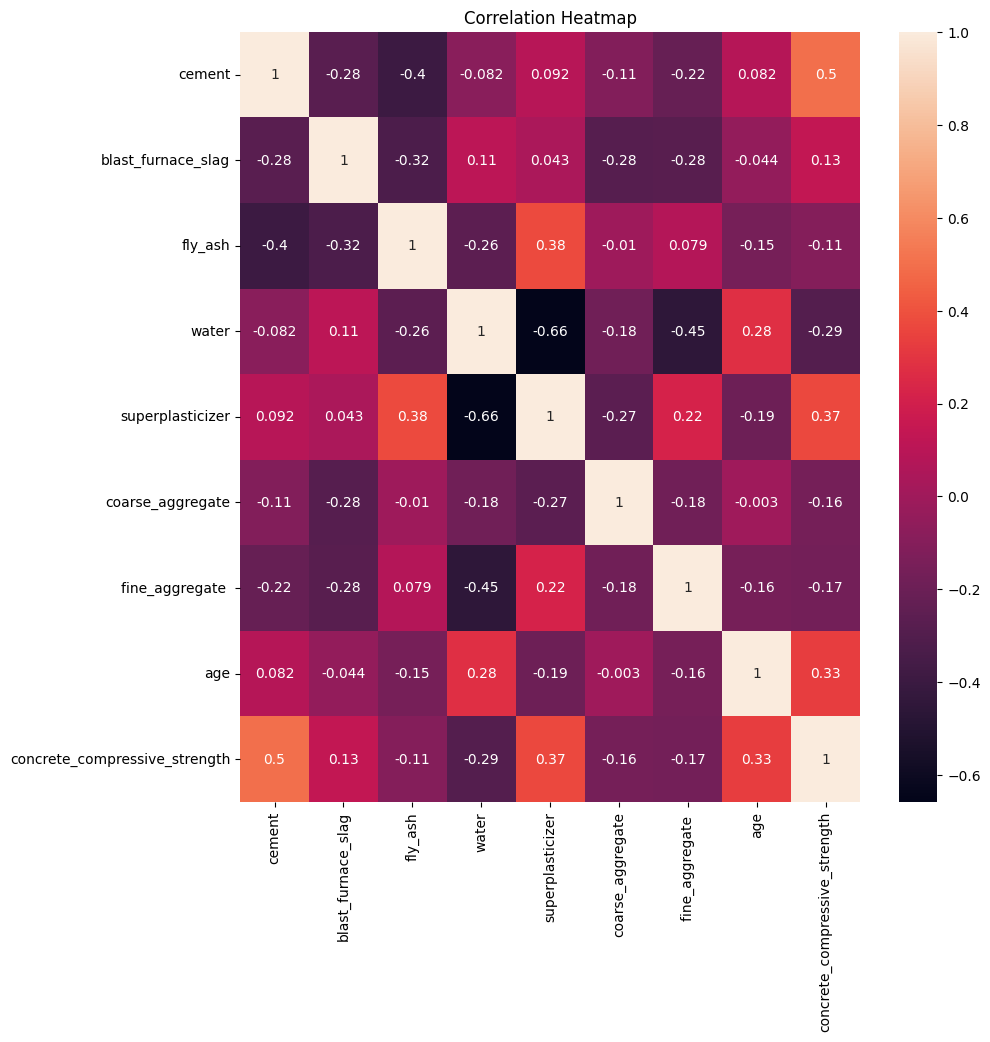

In [14]:
#Visualizing the correlation using a heat map

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

We can also find the correlation of our target variable with the predicting variables.

In [ ]:
#Correlation of 'concrete_compressive_strength' with remaining variables

corr['concrete_compressive_strength'].sort_values(ascending=False)

,concrete_compressive_strength
concrete_compressive_strength,1.000000
cement,0.497832
superplasticizer,0.366079
age,0.328873
blast_furnace_slag,0.134829
fly_ash,-0.105755
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
water,-0.289633


We can see that, 'concrete_compressive_strength' has:
*  moderate positive correlation with features like 'cement' , 'superplasticizer', 'age' and 'blast_furnace_slag'.
* weak negative correlation with features like 'water', 'fine_aggregate', 'coarse_aggregate' and 'fly_ash'.
* Highest correlation is with 'cement' while the lowest correlation is with 'fly_ash'.

,0
cement,"Axes(0.125,0.653529;0.227941x0.226471)"
blast_furnace_slag,"Axes(0.398529,0.653529;0.227941x0.226471)"
fly_ash,"Axes(0.672059,0.653529;0.227941x0.226471)"
water,"Axes(0.125,0.381765;0.227941x0.226471)"
superplasticizer,"Axes(0.398529,0.381765;0.227941x0.226471)"
coarse_aggregate,"Axes(0.672059,0.381765;0.227941x0.226471)"
fine_aggregate,"Axes(0.125,0.11;0.227941x0.226471)"
age,"Axes(0.398529,0.11;0.227941x0.226471)"
concrete_compressive_strength,"Axes(0.672059,0.11;0.227941x0.226471)"


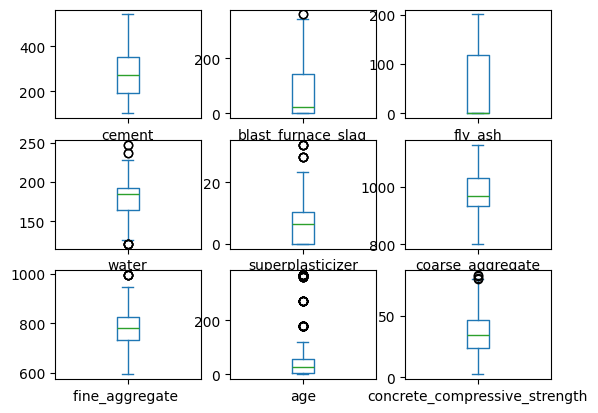

In [54]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

Looks like there are no outliers in our colums.
We can see some outliers in 'age' column.

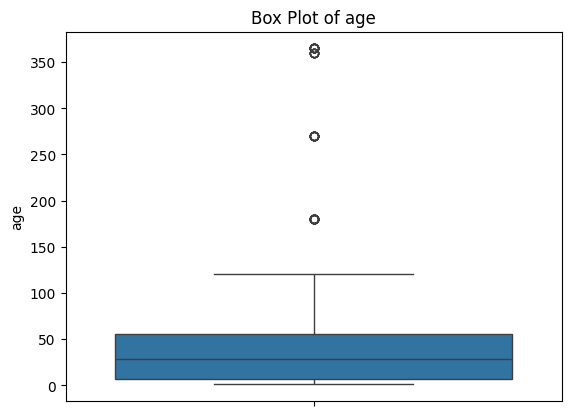

In [32]:
#Box plot for 'age' column

sns.boxplot(df['age'])
plt.title("Box Plot of age")
plt.show()


In [33]:
df.shape

(1030, 9)

Since we have a very large dataset, we donot drop these outlier values.

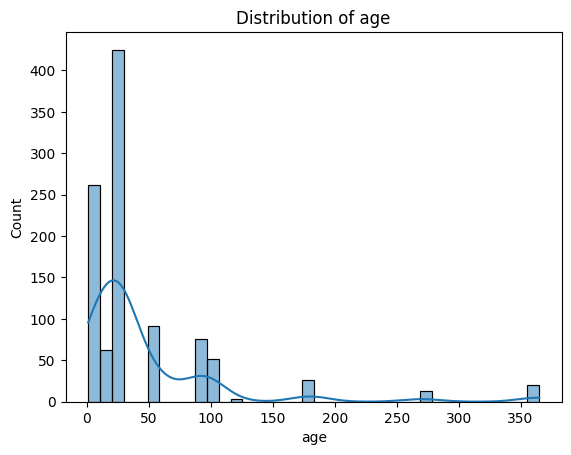

In [43]:
#Distribution of 'age' variable

sns.histplot(df['age'],kde=True)
plt.title("Distribution of age")
plt.show()

The distribution is right-skewed.

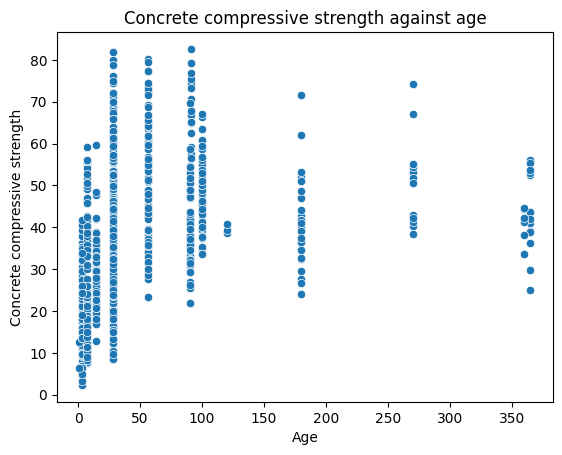

In [44]:
#Plotting concrete_compressive_strength against age

sns.scatterplot(x='age',y='concrete_compressive_strength',data=df)
plt.title("Concrete compressive strength against age")
plt.xlabel("Age")
plt.ylabel("Concrete compressive strength")
plt.show()

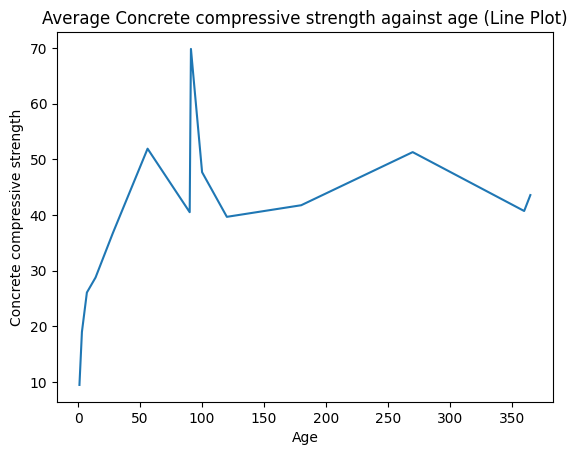

In [47]:
# To use a line plot, group by age and calculate the mean
age_strength_mean = df.groupby('age')['concrete_compressive_strength'].mean().reset_index()

sns.lineplot(x='age', y='concrete_compressive_strength', data=age_strength_mean)
plt.title("Average Concrete compressive strength against age (Line Plot)")
plt.xlabel("Age")
plt.ylabel("Concrete compressive strength")
plt.show()

This shows how the average concrete compressive strength changes as age increases. The maximum average strength is seen at age 100 days.

In [71]:
#Fitting the model
reg = LinearRegression()

#Load our X features and y label
X = df.drop('concrete_compressive_strength',axis=1).values
y = df['concrete_compressive_strength'].values

#Split our data as training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

#Fit the model
reg.fit(X_train,y_train)

#Predict the values
y_pred = reg.predict(X_test)

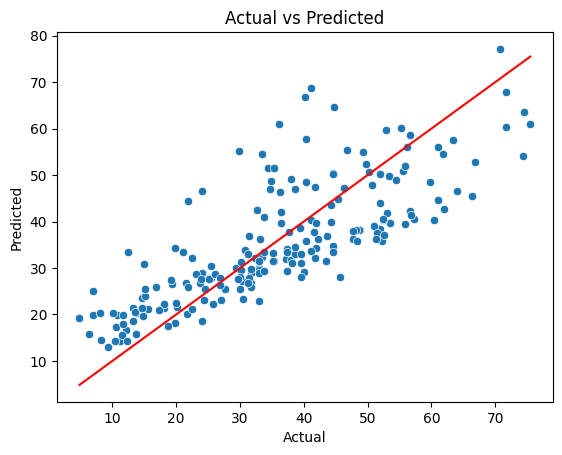

In [63]:
#Evaluate our model

sns.scatterplot(x=y_test,y=y_pred)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [72]:
#Get metrics for model evaluation

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")

R2 Score: 0.6365819156607293
MSE: 84.97439265626709
